# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]


In [5]:
# Fetch current BTC price
print(requests.get(btc_url).json())

# Fetch current ETH price
print(requests.get(eth_url).json())

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19330868, 'total_supply': 19330868, 'max_supply': 21000000, 'quotes': {'USD': {'price': 27291.0, 'volume_24h': 17748591779, 'market_cap': 528458712776, 'percentage_change_1h': -0.361652817312029, 'percentage_change_24h': 0.42328243646367, 'percentage_change_7d': -2.28388854042152, 'percent_change_1h': -0.361652817312029, 'percent_change_24h': 0.42328243646367, 'percent_change_7d': -2.28388854042152}}, 'last_updated': 1680038098}}, 'metadata': {'timestamp': 1680038098, 'num_cryptocurrencies': 3119, 'error': None}}
{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 120451126, 'total_supply': 120451126, 'max_supply': 120451126, 'quotes': {'USD': {'price': 1773.16, 'volume_24h': 9551369030, 'market_cap': 213978134795, 'percentage_change_1h': -0.589685789182784, 'percentage_change_24h': 3.245334

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
	alpaca_api_key,
	alpaca_secret_key,
	api_version="v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-03-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG	
df_ticker = api.get_bars(
	tickers,
	timeframe,
	start=start_date,
	end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"] == "AGG"].drop('symbol', axis=1)
SPY = df_ticker[df_ticker["symbol"] == "SPY"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, join="inner")

# Preview DataFrame
df_ticker.head()

,open,high,low,close,volume,trade_count,vwap,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,,,,,,,
2022-03-28 04:00:00+00:00,106.25,106.5252,106.160,106.36,16188038,51656,106.295856,452.06,455.910,450.060,455.84,131687956,1192521,453.304450
2022-03-29 04:00:00+00:00,106.61,106.8900,106.455,106.86,22782663,67269,106.734047,460.02,462.070,457.180,461.53,173082835,1475317,459.634235
2022-03-30 04:00:00+00:00,106.60,107.1500,106.590,107.15,23074521,49910,107.007761,460.34,461.195,456.465,458.79,159109186,1316482,459.159046
2022-03-31 04:00:00+00:00,107.17,107.3800,107.060,107.10,13788220,44817,107.229272,457.89,458.760,451.160,451.64,119151277,751165,455.454712
2022-04-01 04:00:00+00:00,106.35,106.9500,106.250,106.75,11579091,40126,106.667931,453.31,453.460,449.140,452.92,88675787,624742,451.850852


In [9]:
# Pick AGG and SPY close prices
spy_close_price = SPY["close"][0]
agg_close_price = AGG["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $106.36
Current SPY closing price: $455.84


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22792.00
The current value of your 200 AGG shares is $21272.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = 19385.986877
shares_value = 40616.500000

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [crypto_value + shares_value]}, index=["crypto", "shares"])
# Display savings DataFrame
display(df_savings)

,amount
crypto,60002.486877
shares,60002.486877


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

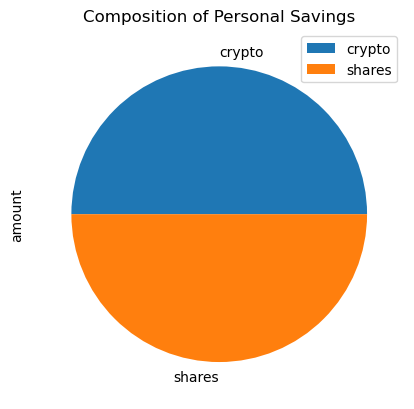

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value + emergency_fund

# Validate saving health
if total_savings > emergency_fund:
	print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
	print("Congratulations on reaching your financial goal!")
else:
	print(f"You are ${emergency_fund - total_savings} away from reaching your goal.")
	

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

NameError: name 'df_stock_data' is not defined

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")